In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

Yhat = lm.predict(X)
Yhat[0:5]
print(lm.intercept_, lm.coef_)

38423.3058581574 [-821.73337832]


In [9]:
X1 = df[['engine-size']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1, Y1)

Yhat1 = lm1.predict(X1)
Yhat1[:5]
print(lm1.intercept_, lm.coef_)

-7963.338906281042 [-821.73337832]


In [12]:
#Multiple  Linear Regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print(lm.intercept_, lm.coef_)

-15806.62462632922 [53.49574423  4.70770099 81.53026382 36.05748882]


In [14]:
print(LinearRegression().fit(df[['normalized-losses', 'highway-mpg']], df['price']).intercept_)
print(LinearRegression().fit(df[['normalized-losses', 'highway-mpg']], df['price']).coef_)

38201.31327245728
[   1.49789586 -820.45434016]


Model Evaluation

(0.0, 48169.109761620406)

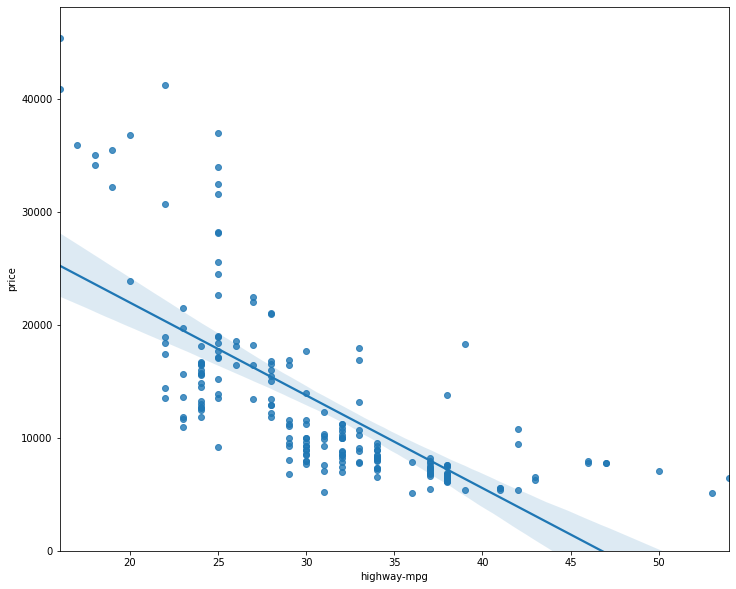

In [15]:
import seaborn as sns
%matplotlib inline

width, height = 12, 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0, )

(0.0, 47414.1)

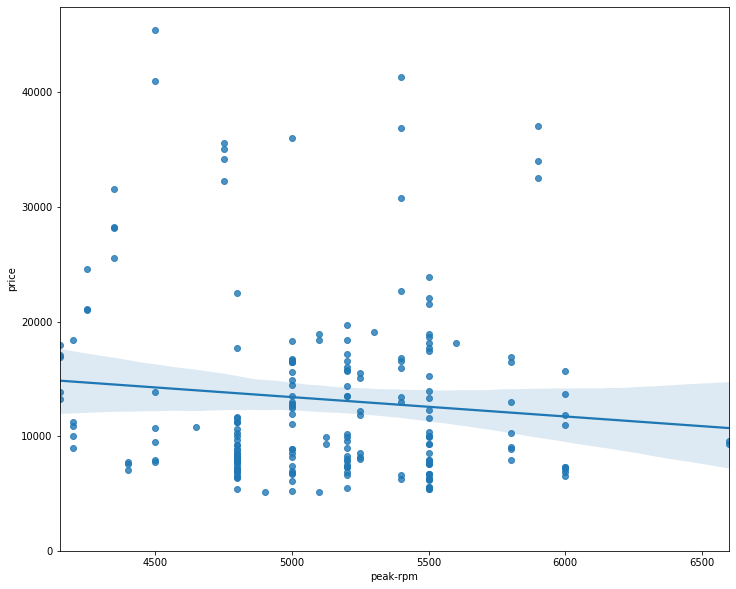

In [16]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0)

In [17]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


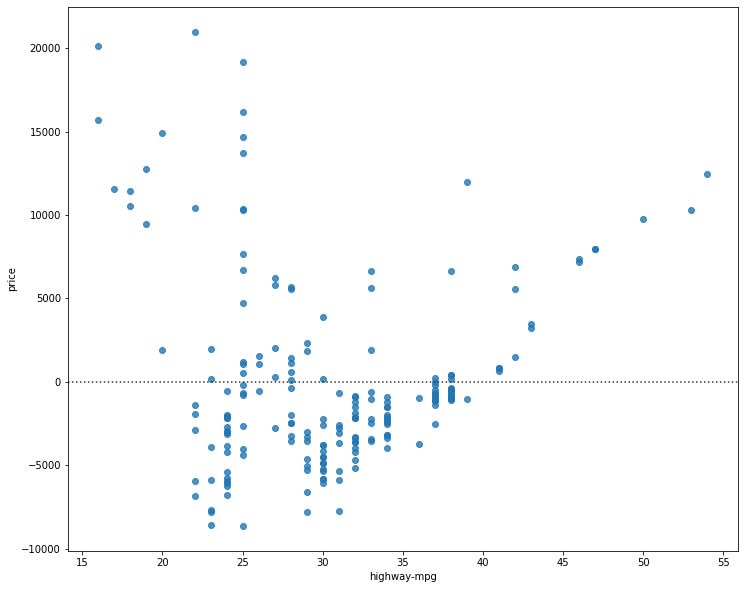

In [18]:
#Residual Plots
#Inference from Residual Model
#Since the Residual plot does not look following a linear relationship, hence 
#it is bettter here to keep a curiviliner regression, since differences are
#getting up and down differently, otw LR would have been better.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [19]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


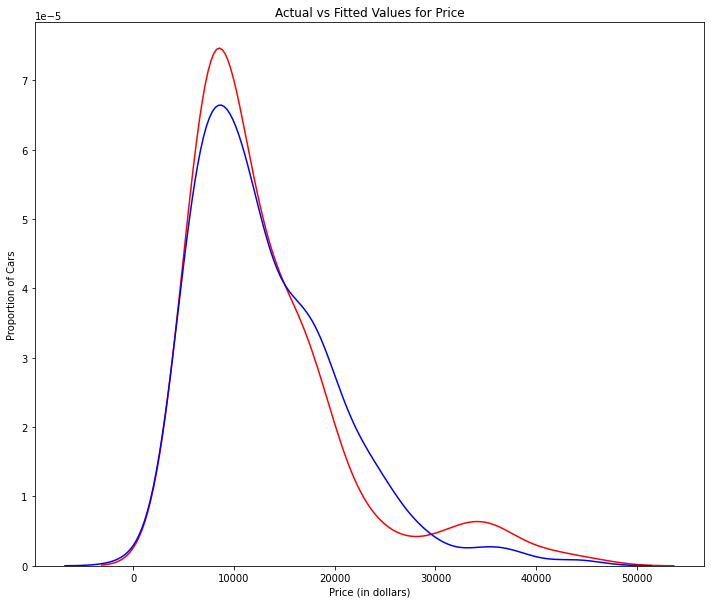

In [22]:
plt.figure(figsize=(width, height))
#Histogram is False since continuous variable
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual-Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Polynomial Regression and Pipeline

In [24]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Price of Cars')

  plt.show()
  plt.close()

In [25]:
x = df['highway-mpg']
y= df['price']

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


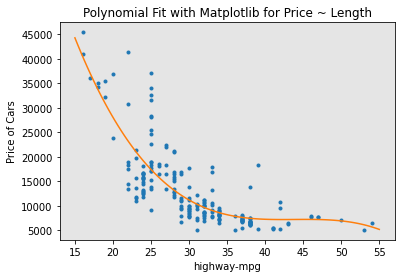

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [29]:
f=np.polyfit(x, y, 3)
p=np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [32]:
Z_pr = pr.fit_transform(Z)
Z.shape, Z_pr.shape

((201, 4), (201, 15))

Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [36]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [37]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Measures for In-Sample Evaluation

In [38]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [40]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [41]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [43]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
mean_squared_error(df['price'], p(x))

The R-square value is:  0.6741946663906517


20474146.426361226

Prediction and Decision Making

In [45]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm
print(type(new_input))

<class 'numpy.ndarray'>


In [46]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

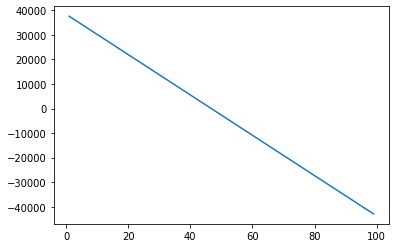

In [48]:
plt.plot(new_input, yhat)
plt.show()

Multiple Linear Regression is the best model for the given case study.